In [115]:
# ==============================
# 1. IMPORT LIBRARIES
# ==============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score


In [65]:
# ==============================
# 2. LOAD DATA
# ==============================
df = pd.read_csv("realistic_kraljic_dataset.csv")
df

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
0,P001,Semiconductors,South America,81,171,255.03,5,5,4,Yes,Strategic
1,P002,Semiconductors,South America,8,763,380.33,5,4,4,Yes,Strategic
2,P003,Pharma APIs,Asia,65,413,385.24,4,5,5,Yes,Strategic
3,P004,Semiconductors,South America,70,882,287.64,5,5,5,Yes,Strategic
4,P005,Lithium Batteries,Asia,15,120,382.26,4,4,4,Yes,Strategic
...,...,...,...,...,...,...,...,...,...,...,...
995,P996,Printer Ink,Global,19,19648,10.20,2,1,1,No,Non-Critical
996,P997,Cleaning Supplies,Global,21,19143,15.30,1,2,1,No,Non-Critical
997,P998,Uniforms,Global,70,5352,30.23,1,3,2,No,Non-Critical
998,P999,Printer Ink,Global,44,18070,30.73,1,1,2,No,Non-Critical


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   object 
 1   Product_Name          1000 non-null   object 
 2   Supplier_Region       1000 non-null   object 
 3   Lead_Time_Days        1000 non-null   int64  
 4   Order_Volume_Units    1000 non-null   int64  
 5   Cost_per_Unit         1000 non-null   float64
 6   Supply_Risk_Score     1000 non-null   int64  
 7   Profit_Impact_Score   1000 non-null   int64  
 8   Environmental_Impact  1000 non-null   int64  
 9   Single_Source_Risk    1000 non-null   object 
 10  Kraljic_Category      1000 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


In [69]:
df.describe()

,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,47.508000,4753.182000,169.390440,2.988000,3.024000,2.778000
std,23.630454,5625.105273,132.104809,1.537602,1.542661,1.392356
min,7.000000,50.000000,10.090000,1.000000,1.000000,1.000000
25%,27.000000,363.000000,50.460000,1.000000,2.000000,2.000000
50%,48.000000,1105.500000,130.640000,3.000000,3.000000,2.500000
75%,67.000000,8111.750000,255.165000,4.250000,5.000000,4.000000
max,89.000000,19940.000000,499.320000,5.000000,5.000000,5.000000


In [71]:
df.columns

Index(['Product_ID', 'Product_Name', 'Supplier_Region', 'Lead_Time_Days',
       'Order_Volume_Units', 'Cost_per_Unit', 'Supply_Risk_Score',
       'Profit_Impact_Score', 'Environmental_Impact', 'Single_Source_Risk',
       'Kraljic_Category'],
      dtype='object')

In [73]:
df.head()

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
0,P001,Semiconductors,South America,81,171,255.03,5,5,4,Yes,Strategic
1,P002,Semiconductors,South America,8,763,380.33,5,4,4,Yes,Strategic
2,P003,Pharma APIs,Asia,65,413,385.24,4,5,5,Yes,Strategic
3,P004,Semiconductors,South America,70,882,287.64,5,5,5,Yes,Strategic
4,P005,Lithium Batteries,Asia,15,120,382.26,4,4,4,Yes,Strategic


In [75]:
df.shape

(1000, 11)

In [77]:
df.dtypes

Product_ID               object
Product_Name             object
Supplier_Region          object
Lead_Time_Days            int64
Order_Volume_Units        int64
Cost_per_Unit           float64
Supply_Risk_Score         int64
Profit_Impact_Score       int64
Environmental_Impact      int64
Single_Source_Risk       object
Kraljic_Category         object
dtype: object

In [79]:
df.isnull().sum()

Product_ID              0
Product_Name            0
Supplier_Region         0
Lead_Time_Days          0
Order_Volume_Units      0
Cost_per_Unit           0
Supply_Risk_Score       0
Profit_Impact_Score     0
Environmental_Impact    0
Single_Source_Risk      0
Kraljic_Category        0
dtype: int64

In [81]:
df['Kraljic_Category'].unique()

array(['Strategic', 'Bottleneck', 'Leverage', 'Non-Critical'],
      dtype=object)

In [83]:
df['Product_Name'].unique()

array(['Semiconductors', 'Pharma APIs', 'Lithium Batteries', 'AI Chips',
       'Customized Valves', 'Rare Earth Metals', 'Specialty Gases',
       'Catalysts', 'Standard Bolts', 'PVC Pipes', 'Packaging Material',
       'Steel Beams', 'Cleaning Supplies', 'Uniforms', 'Printer Ink',
       'Office Stationery'], dtype=object)

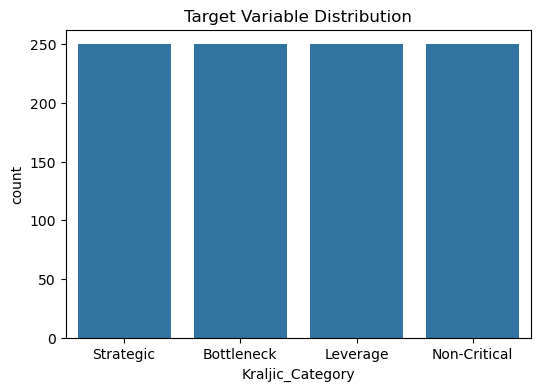

In [85]:
# ==============================
# 3. BASIC EDA
# ==============================
# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Kraljic_Category", data=df)
plt.title("Target Variable Distribution")
plt.show()

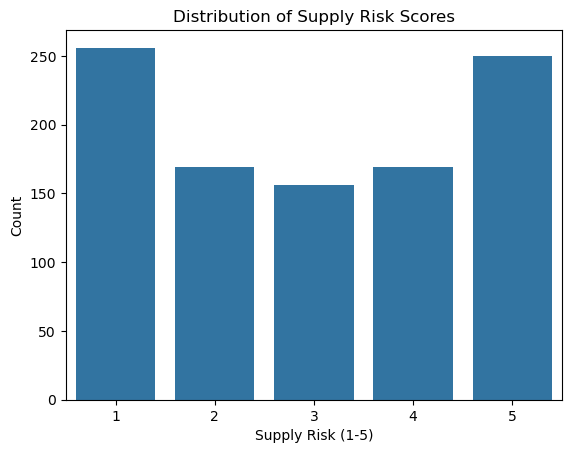

In [86]:
sns.countplot(x='Supply_Risk_Score', data=df)
plt.title('Distribution of Supply Risk Scores')
plt.xlabel('Supply Risk (1-5)')
plt.ylabel('Count')
plt.show()

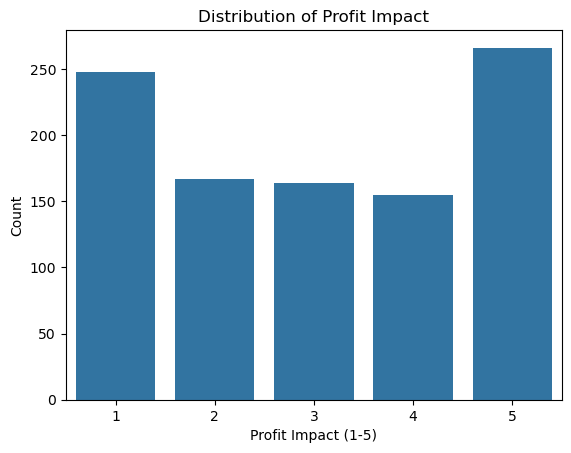

In [88]:
sns.countplot(x='Profit_Impact_Score', data=df)
plt.title('Distribution of Profit Impact')
plt.xlabel('Profit Impact (1-5)')
plt.ylabel('Count')
plt.show()

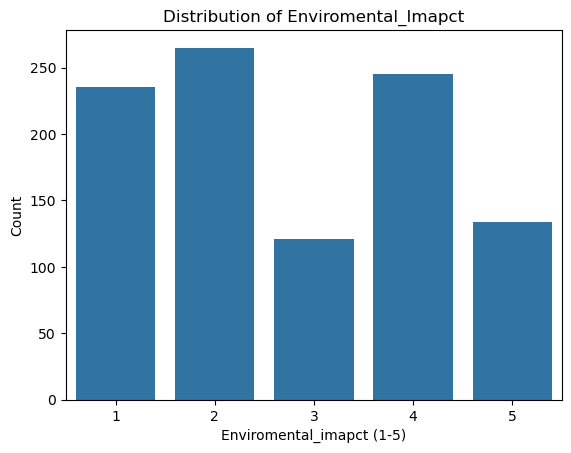

In [90]:
sns.countplot(x='Environmental_Impact', data=df)
plt.title('Distribution of Enviromental_Imapct')
plt.xlabel('Enviromental_imapct (1-5)')
plt.ylabel('Count')
plt.show()

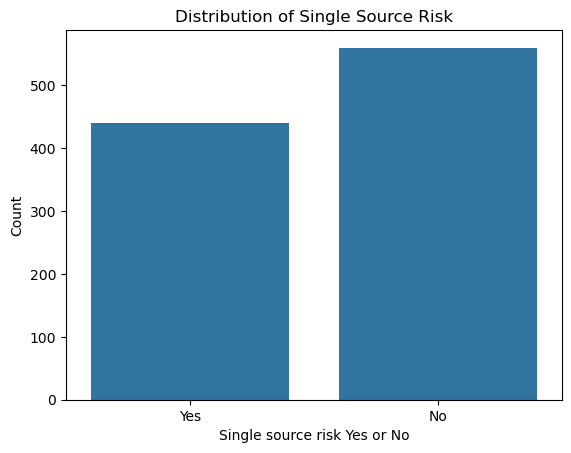

In [91]:
sns.countplot(x='Single_Source_Risk', data=df)
plt.title('Distribution of Single Source Risk')
plt.xlabel('Single source risk Yes or No')
plt.ylabel('Count')
plt.show()

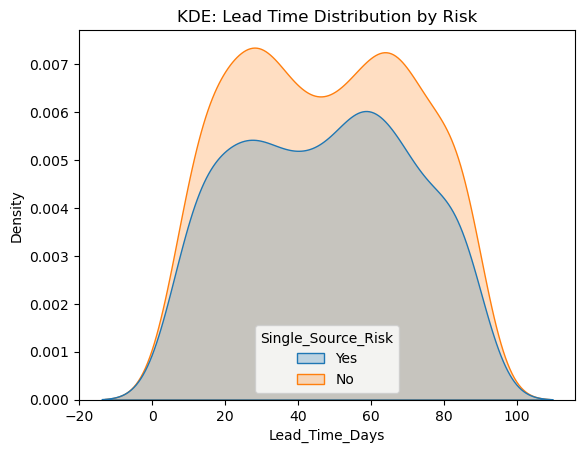

In [92]:
# KDE
plt.figure()
sns.kdeplot(data=df, x="Lead_Time_Days", hue="Single_Source_Risk", fill=True)
plt.title("KDE: Lead Time Distribution by Risk")
plt.show()

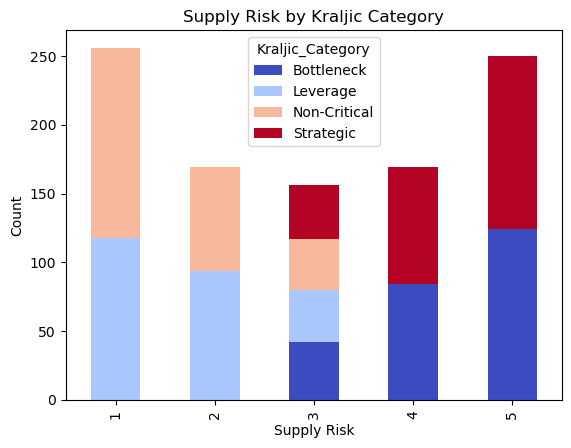

In [94]:
pd.crosstab(df['Supply_Risk_Score'], df['Kraljic_Category']).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.title('Supply Risk by Kraljic Category')
plt.xlabel('Supply Risk')
plt.ylabel('Count')
plt.show()

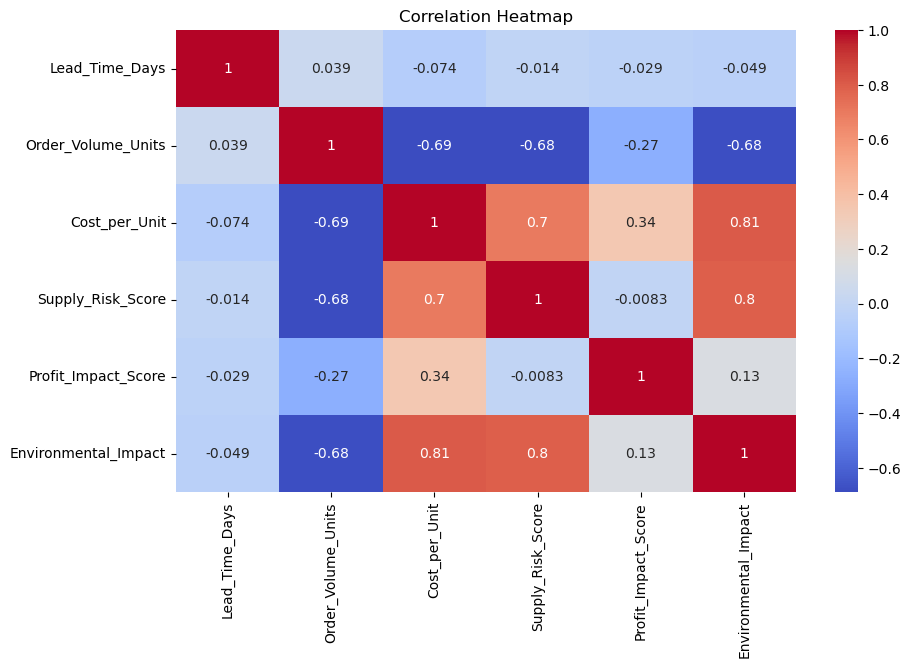

In [96]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

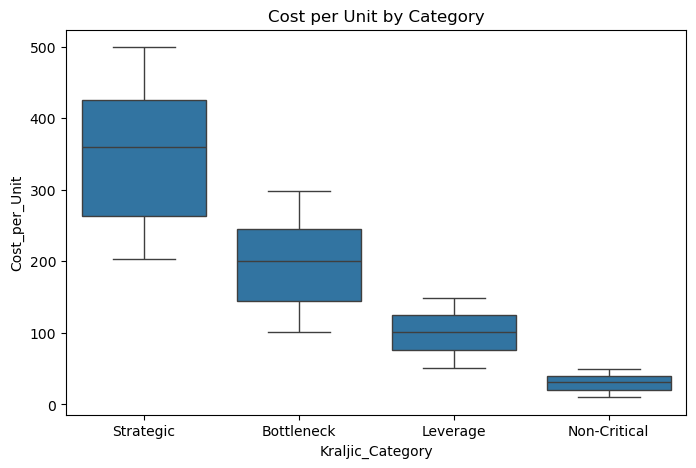

In [98]:
# Boxplot of cost per category
plt.figure(figsize=(8,5))
sns.boxplot(x="Kraljic_Category", y="Cost_per_Unit", data=df)
plt.title("Cost per Unit by Category")
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_23572\1428938573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Supplier_Region', y='Lead_Time_Days', palette='Set2')


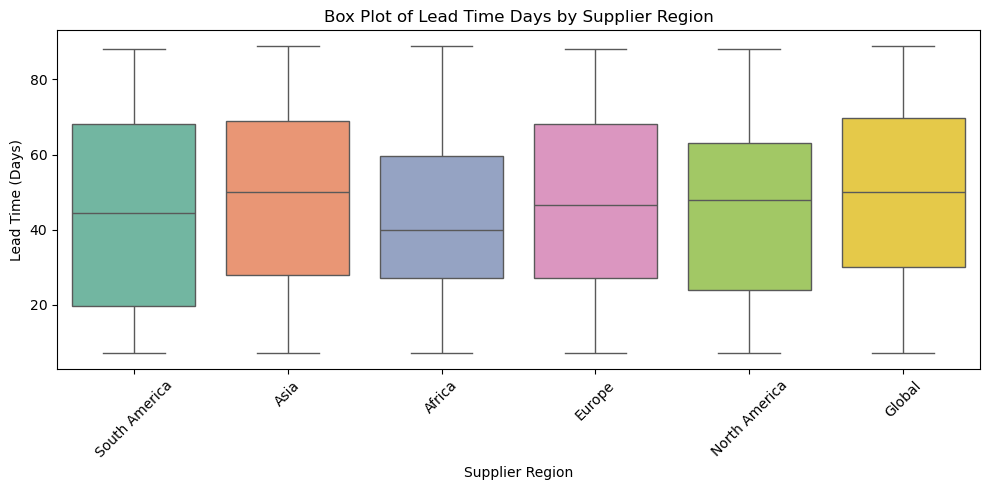

In [100]:
# Box Plot: Lead Time Days across Supplier Regions
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Supplier_Region', y='Lead_Time_Days', palette='Set2')
plt.title('Box Plot of Lead Time Days by Supplier Region')
plt.xlabel('Supplier Region')
plt.ylabel('Lead Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [102]:
# ==============================
# 4. PREPROCESSING
# ==============================
df2 = df.copy()

# Encode categorical columns
label_encoders = {}
for col in ["Product_Name", "Supplier_Region", "Single_Source_Risk", "Kraljic_Category"]:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    label_encoders[col] = le

# Features and target
X = df2.drop(columns=["Product_ID", "Kraljic_Category"])
y = df2["Kraljic_Category"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [107]:
# ==============================
# 5. TRAIN/TEST SPLIT
# ==============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Logistic Regression ===
Accuracy: 0.985
              precision    recall  f1-score   support

  Bottleneck       1.00      0.94      0.97        50
    Leverage       1.00      1.00      1.00        50
Non-Critical       1.00      1.00      1.00        50
   Strategic       0.94      1.00      0.97        50

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



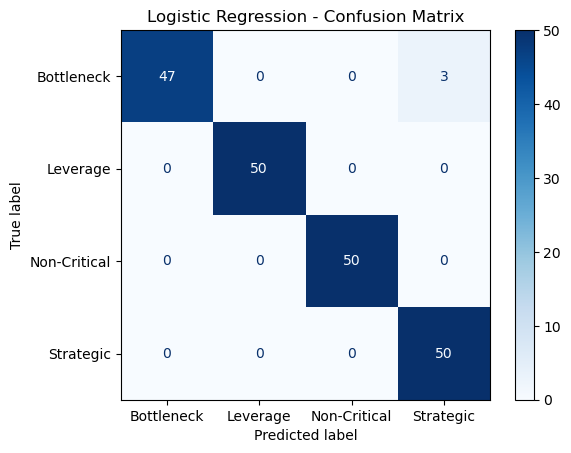


=== Random Forest ===
Accuracy: 1.0
              precision    recall  f1-score   support

  Bottleneck       1.00      1.00      1.00        50
    Leverage       1.00      1.00      1.00        50
Non-Critical       1.00      1.00      1.00        50
   Strategic       1.00      1.00      1.00        50

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



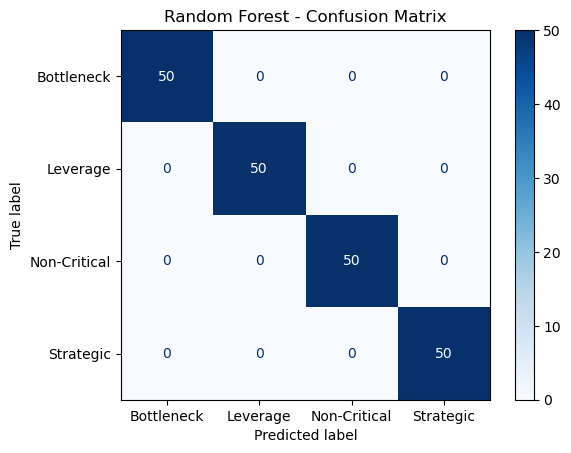


=== XGBoost ===
Accuracy: 0.975
              precision    recall  f1-score   support

  Bottleneck       0.98      0.98      0.98        50
    Leverage       1.00      0.94      0.97        50
Non-Critical       0.94      1.00      0.97        50
   Strategic       0.98      0.98      0.98        50

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



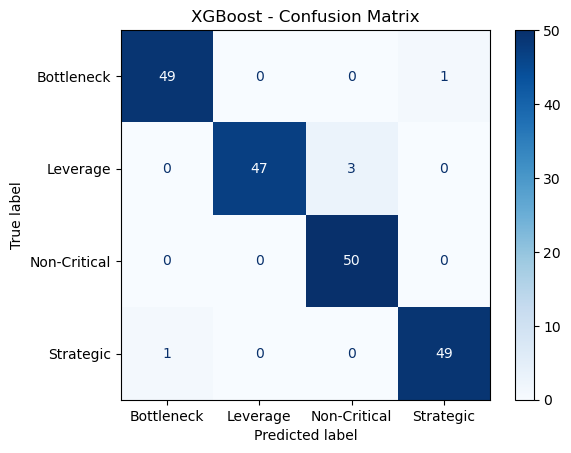


=== SVM ===
Accuracy: 0.79
              precision    recall  f1-score   support

  Bottleneck       0.75      1.00      0.85        50
    Leverage       0.69      0.92      0.79        50
Non-Critical       1.00      0.58      0.73        50
   Strategic       0.89      0.66      0.76        50

    accuracy                           0.79       200
   macro avg       0.83      0.79      0.78       200
weighted avg       0.83      0.79      0.78       200



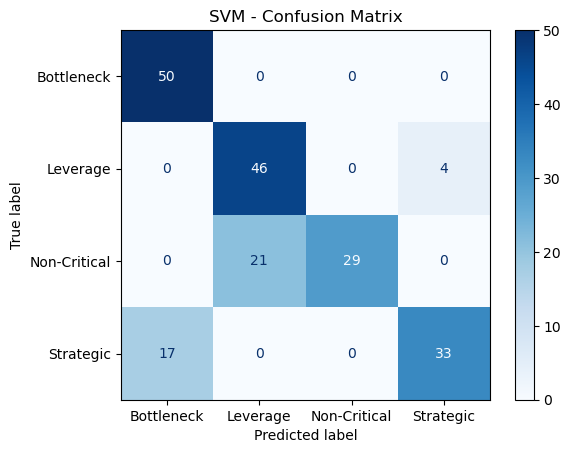


=== Gradient Boosting ===
Accuracy: 1.0
              precision    recall  f1-score   support

  Bottleneck       1.00      1.00      1.00        50
    Leverage       1.00      1.00      1.00        50
Non-Critical       1.00      1.00      1.00        50
   Strategic       1.00      1.00      1.00        50

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



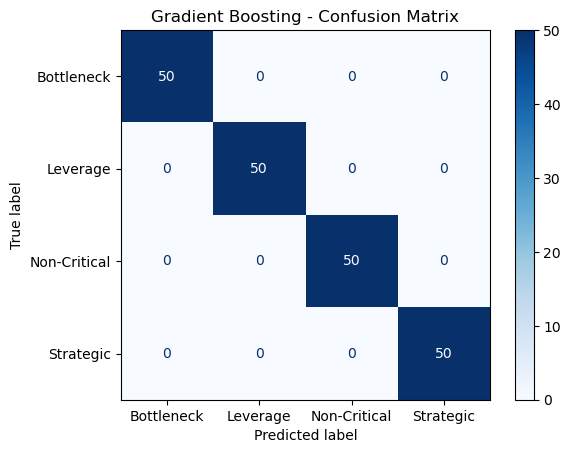


=== K-Nearest Neighbors ===
Accuracy: 0.86
              precision    recall  f1-score   support

  Bottleneck       0.86      0.88      0.87        50
    Leverage       0.81      0.92      0.86        50
Non-Critical       0.91      0.78      0.84        50
   Strategic       0.88      0.86      0.87        50

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



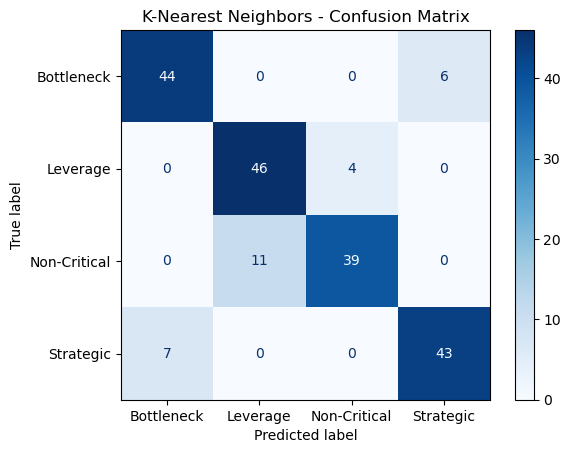


=== Naive Bayes ===
Accuracy: 1.0
              precision    recall  f1-score   support

  Bottleneck       1.00      1.00      1.00        50
    Leverage       1.00      1.00      1.00        50
Non-Critical       1.00      1.00      1.00        50
   Strategic       1.00      1.00      1.00        50

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



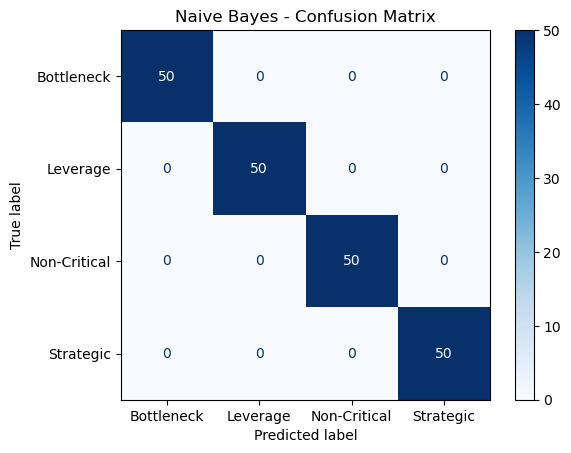


=== Decision Tree ===
Accuracy: 0.99
              precision    recall  f1-score   support

  Bottleneck       1.00      0.96      0.98        50
    Leverage       1.00      1.00      1.00        50
Non-Critical       1.00      1.00      1.00        50
   Strategic       0.96      1.00      0.98        50

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



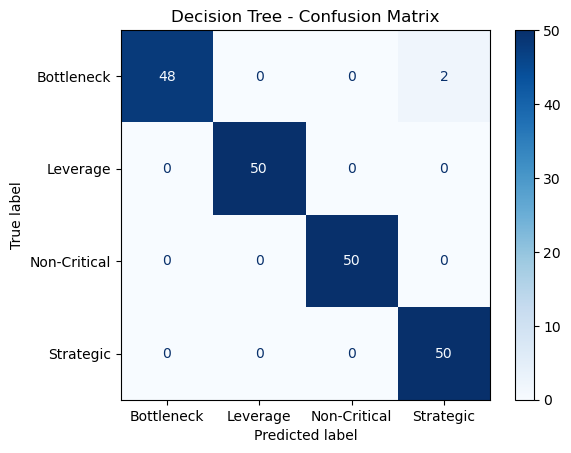

In [123]:
# ==============================
# 6. MODEL TRAINING & EVALUATION (All models)
# ==============================
results = {}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='ovr'),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss', random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = model.score(X_test, y_test)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recal = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append({
        'Model': name,
        'Test Accuracy': acc,
        'Test Precision': prec,
        'Test Recall Score': recal,
        'Test F1 Score': f1
    })

    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred, target_names=label_encoders['Kraljic_Category'].classes_))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=label_encoders['Kraljic_Category'].classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()




In [147]:
# ==============================
# 7. COLLECTED SUMMARY
# ==============================
results_df = pd.DataFrame(summary)
pd.set_option('display.width', 1000) 
print(results_df)


                 Model  Test Accuracy  Test Precision  Test Recall Score  Test F1 Score
0  Logistic Regression          0.985        0.985849              0.985       0.984986
1        Random Forest          1.000        1.000000              1.000       1.000000
2              XGBoost          0.975        0.975849              0.975       0.974986
3                  SVM          0.790        0.831182              0.790       0.783456
4    Gradient Boosting          1.000        1.000000              1.000       1.000000
5  K-Nearest Neighbors          0.860        0.863573              0.860       0.859624
6          Naive Bayes          1.000        1.000000              1.000       1.000000
7        Decision Tree          0.990        0.990385              0.990       0.989996


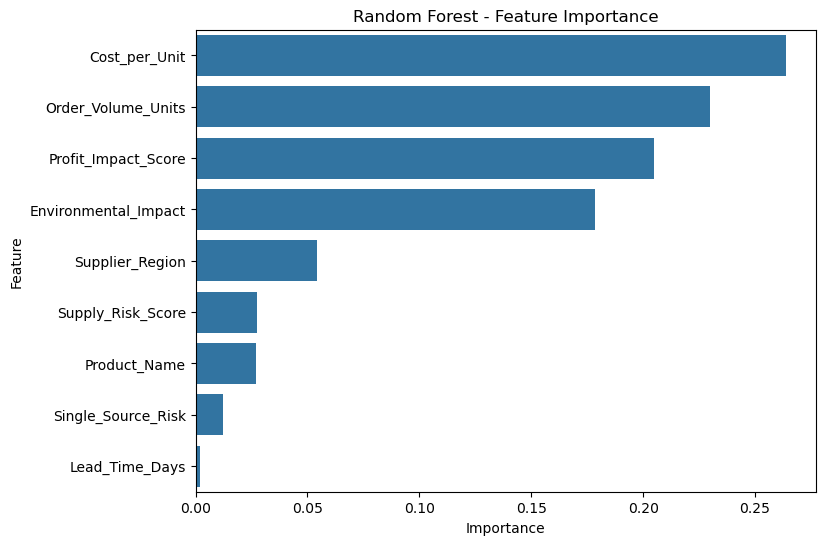

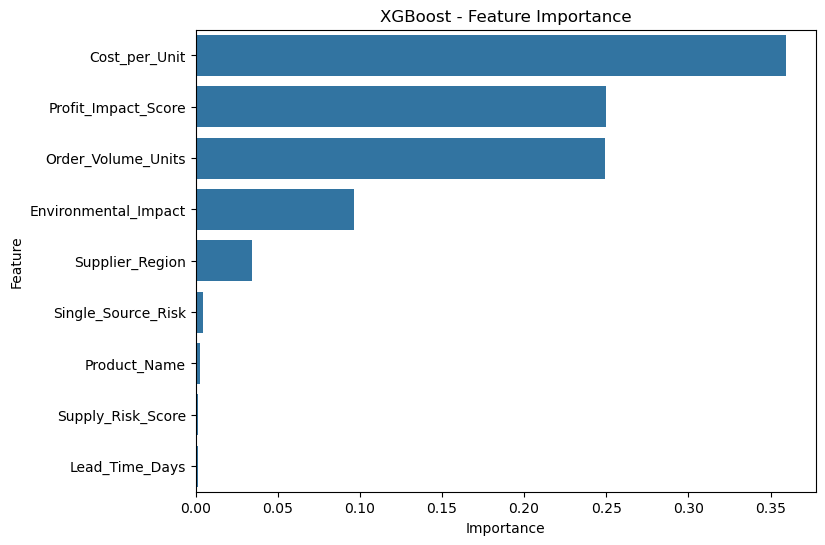

In [31]:
# ==============================
# 8. FEATURE IMPORTANCE PLOTS (Tree Models)
# ==============================
def plot_feature_importance(model, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features = X.columns
        feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
        feature_importance_df.sort_values(by="Importance", ascending=False, inplace=True)
        
        plt.figure(figsize=(8,6))
        sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
        plt.title(f"{model_name} - Feature Importance")
        plt.show()

plot_feature_importance(models["Random Forest"], "Random Forest")
plot_feature_importance(models["XGBoost"], "XGBoost")

C:\Users\harsh\AppData\Local\Temp\ipykernel_23572\2602624013.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(model_names))


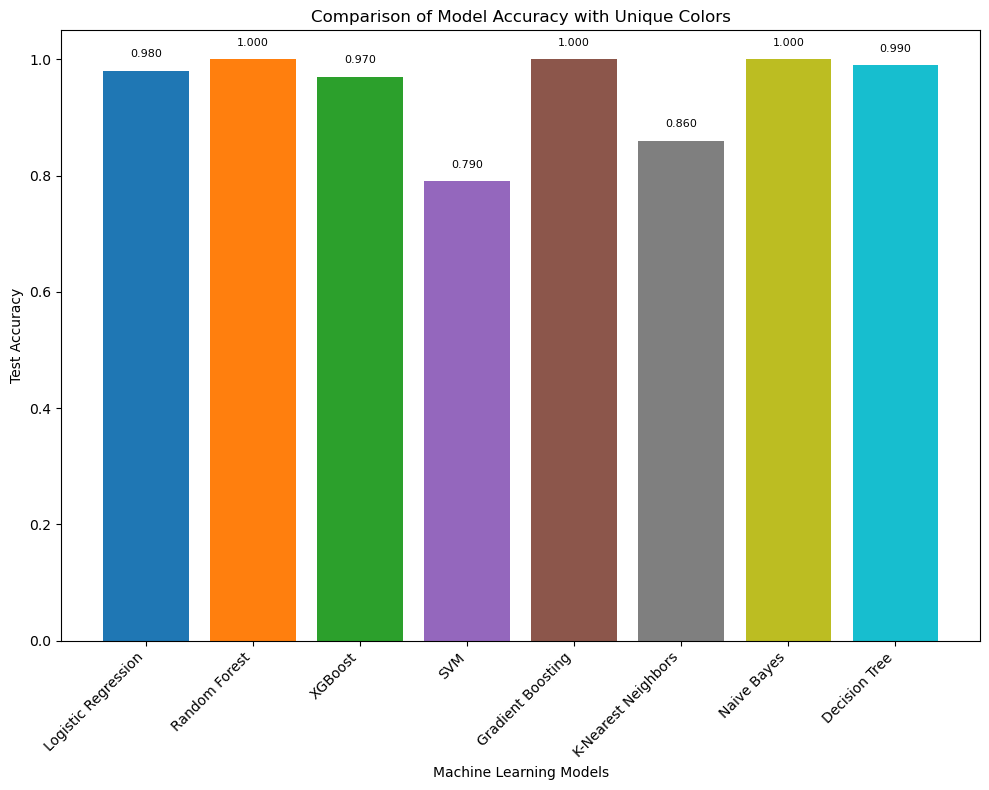

In [143]:
# ==============================
# 9. COMPARE MODEL PERFORMANCE
# ==============================
model_names = [
    'Logistic Regression',
    'Random Forest',
    'XGBoost',
    'SVM',
    'Gradient Boosting',
    'K-Nearest Neighbors',
    'Naive Bayes',
    'Decision Tree'
]

accuracies = [
    0.98,  # Logistic Regression
    1.00,  # Random Forest
    0.97,  # XGBoost
    0.79,  # SVM
    1.00,  # Gradient Boosting
    0.86,  # K-Nearest Neighbors
    1.00,  # Naive Bayes
    0.99   # Decision Tree
]

# Use a distinct color for each bar using a colormap
colors = plt.cm.get_cmap('tab10', len(model_names))

plt.figure(figsize=(10, 8))
bars = plt.bar(model_names, accuracies, color=[colors(i) for i in range(len(model_names))])
plt.xlabel('Machine Learning Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Accuracy with Unique Colors')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')

# Add accuracy labels on top of each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{acc:.3f}', 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
